In [1]:
'''
    It's common import all libraries at the beginning of the script, howver in a notebook,
    it's better to import libraries as needed to avoid loading unnecessary libraries.
    
    '''

# #  Import the necessary liabraries  
# import pandas as pd
# #from sklearn.model_selection import train_test_split
# from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.neural_network import MLPClassifier  # Import the MLPClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# # from imblearn.over_sampling import SMOTE

# from sklearn.neighbors import KNeighborsClassifier

# # SHAP and LIME library for explanability of the EPC label classifications
# import shap  
# # import lime
# # import lime.lime_tabular


# import matplotlib.pyplot as plt
# from matplotlib import colors
# import numpy as np
# import re  # regular expressions


# import seaborn as sns

# # for deep explainer NN
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import to_categorical
# from sklearn.tree import DecisionTreeClassifier
# from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.optimizers import Adam

# from sklearn.ensemble import RandomForestClassifier
# # from pdpbox import pdp
# from sklearn.decomposition import PCA


# import xgboost as xgb

# # Import additional libraries for clustering
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")


# Import Dataset

In [2]:
import pandas as pd
import os
import requests

# Define the filename and the URL to download the dataset
filename = "energy_efficiency_certificates.csv"
url = "https://analisi.transparenciacatalunya.cat/api/views/j6ii-t3w2/rows.csv?accessType=DOWNLOAD"

# Check if the file already exists locally
if not os.path.exists(filename):
    # If not, download the file from the URL
    response = requests.get(url)
    # Save the downloaded content to a local CSV file
    with open(filename, "wb") as f:
        f.write(response.content)
    # Load the CSV into a pandas DataFrame
    df_energy = pd.read_csv(filename)
else:
    # If the file exists, load it directly into a pandas DataFrame
    df_energy = pd.read_csv(filename)


# Load the schema with the English column names
schema_df = pd.read_csv('dataset_schema.csv')

# Rename columns in df_energy because the orginal is not in English
df_energy.columns = schema_df['Column Name']

# Catalonia Building Energy-Efficiency Certificates (EPC) Dataset  
*Open Data Catalonia · Catalan Energy Institute (ICAEN)*  

---

## 1  Context and Motivation  
Energy use in buildings is one of the European Union’s largest climate-mitigation levers.  
- **2002 → 2010 → 2012 Directives** (EPBD 2002/91/EC, recast 2010/31/EU, EED 2012/27/EU) made **Energy Performance Certificates (EPCs)** mandatory for all real-estate transactions.  
- **Spain** transposed the EPBD in **2007** for new builds (RD 47/2007) and in **2013** for the existing stock (RD 235/2013).  
- Since **1 June 2013** every new, sold, or rented dwelling in **Catalonia** must be rated from **A (best) to G (worst)** for both energy use and CO₂ emissions.  

Catalonia’s EPC register has therefore become an unparalleled longitudinal record of building-stock efficiency, retrofit uptake, and renewable-system diffusion.

---

## 2  Dataset Provenance  
| Property | Detail |
|----------|--------|
| **Publisher** | Catalan Energy Institute (ICAEN) |
| **Open-data host** | [analisi.transparenciacatalunya.cat](https://analisi.transparenciacatalunya.cat) |
| **Initial release** | 7 May 2019 |
| **Last data refresh** | 30 Apr 2025 |
| **Update cadence** | **Weekly** (new certificates + metadata fixes) |
| **Rows (2025-05 snapshot)** | **≈ 1 340 000** certificates |
| **Columns** | **69** (see full schema below) |
| **Spatial scope** | All 947 Catalan municipalities; WGS 84 geocodes + UTM |
| **Temporal scope** | EPCs issued **2007 – present** (earliest build years ~ 1850) |
| **Licence** | “Open Data BCN” terms · no usage fee · citation required |

> ⚠ **Note** Certificates are **self-reported by qualified assessors**; some fields may be missing or estimated.

---

## 3  What Each Record Contains  

### 3.1 Core identifiers and location  
- `NUM_CASE` (unique certificate ID)  
- Full address & cadastral reference  
- Municipality / county / province codes  
- Precise **latitude / longitude** in WGS 84  

### 3.2 Headline ratings  
| Field | Description | Scale |
|-------|-------------|-------|
| `consumer_qualification_d` | **Non-renewable primary energy rating** | **A–G** |
| `emissions_rating` | **CO₂-emissions rating** | **A–G** |

### 3.3 Quantitative performance  
- `non_renewable_primary_energy` (kWh m⁻² yr⁻¹)  
- `co2_emissions` (kg CO₂ m⁻² yr⁻¹)  
- `final_energy_consumption` (kWh m⁻² yr⁻¹)  
- Service-specific energy & emissions for **heating, cooling, DHW, lighting**.

### 3.4 Building characteristics  
- `year_of_construction`, `cadastral_meters` (floor area)  
- `us_building` (residential / tertiary categories)  
- Average **U-values** for façades & windows + CTE regulatory limits.  
- Presence of **renewables & low-carbon tech** (`solar_photovoltaic`, `solar_thermal`, `geothermal_energy`, `electric_vehicle`, `district_network`, `biomass_system`).  

### 3.5 Retrofit metadata  
- `energy_rehabilitation` (Yes/No)  
- Free-text `rehabilitation_actions`.  

---

## 4  Typical Use-Cases  
1. **Spatial analytics** – map EPC ratings vs. socio-economic indicators at census-tract level.  
2. **Policy evaluation** – track retrofit rates before/after subsidy schemes.  
3. **Stock modelling** – create archetypes for building-energy simulation (TABULA, Hotmaps).  
4. **Machine-learning research** – predict EPC class from geometries, climate zone, and age.  
5. **Urban-planning dashboards** – identify high-priority renovation clusters.  

Check out the [Energy Efficiency Certification: Everything You Need to Know](https://tecno-consultor.com/en/energy-efficiency-certification/) on the common retrofit actions. 

---

## 5  Access Methods  

| Method | Endpoint / Format |
|--------|-------------------|
| **Download (bulk)** | CSV, JSON, RDF via portal “Export” |
| **API** | Socrata SODA REST: `https://analisi.transparenciacatalunya.cat/resource/j6ii-t3w2.json` |
| **Web viewer** | Interactive map & faceted search on dataset page |

Example SODA query (Python):
```python
import requests, pandas as pd
url = "https://analisi.transparenciacatalunya.cat/resource/j6ii-t3w2.csv"
params = {"$select": "year_of_construction, consumer_qualification_d, count(*)",
          "$group":  "year_of_construction, consumer_qualification_d"}
df = pd.read_csv(url, params=params)



## Dataset exploration

Below is a sample of the dataset, after the column names have been translated into English. The data contained in the dataset is still in Spanish.

In [3]:
df_energy

Column Name,NUM_CASE,ADDRESS,NUMBER,SCALE,APARTMENT,DOOR,POSTAL_CODE,POPULATION,REGION,NAME_PROVINCE,...,Heating energy demand,Cooling energy demand qualification,Cooling energy demand,RESIDENTIAL VENTILATION,LENGTH,LATITUDE,GEOREFERENCE,ENERGY_REHABILITATION,REHABILITATION_ACTIONS,ENTRY_DATE
0,2103STTDZ,Carrer OM,13,NaN,NaN,NaN,8650.0,Sallent,Bages,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16/04/2015
1,BHDLM04GZ,Partida CAPARRELLA,77,NaN,NaN,NaN,25192.0,Lleida,Segrià,Lleida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26/05/2015
2,L4HJTXJHF,Carrer VEREMA,4,NaN,NaN,NaN,17493.0,Vilajuïga,Alt Empordà,Girona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16/06/2015
3,0FZ88B8FX,Ronda FERRAN PUIG,17,NaN,NaN,NaN,17001.0,Girona,Gironès,Girona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/07/2015
4,R6ZGPQV7T,Camí Marganell a Montserrat,107,NaN,NaN,NaN,8298.0,Marganell,Bages,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06/08/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340357,5KG95J0GL,Carrer Andreu Soler,9,NaN,4,3,8930.0,Sant Adrià de Besòs,Barcelonès,Barcelona,...,120.18,D,10.38,NaN,2.218195,41.432345,POINT (2.21819490766 41.432344774775),NO,NaN,18/07/2019
1340358,YQNLZZ0C5,Carrer COMTES DE BELL·LLOC,144,NaN,2,4,8014.0,Barcelona,Barcelonès,Barcelona,...,65.42,A,0.99,0.63,2.136314,41.382323,POINT (2.136314316302 41.382323041997),NO,NaN,21/05/2018
1340359,6LSSPS7JJ,Carrer Francesc Camprodon,83,NaN,1,1,17401.0,Arbúcies,Selva,Girona,...,42.45,B,2.42,NaN,2.517223,41.815067,POINT (2.517223165429 41.815067252326),NO,NaN,27/01/2021
1340360,2RL2YQ0LP,Carrer Igualtat,26,NaN,4,2,8902.0,Hospitalet de Llobregat (L'),Barcelonès,Barcelona,...,100.61,B,2.19,NaN,2.125328,41.360689,POINT (2.125327822606 41.36068910736),NO,NaN,07/02/2023


In [4]:
from IPython.display import display, HTML

# Displays the range of values and some stats for each column in the DataFrame. Note that the table only include fields with numeric values.
display(HTML(df_energy.describe().to_html(max_cols=None)))


Column Name,POSTAL_CODE,POPULATION_CODE,COUNTY_CODE,PROVINCE_CODE,CADASTRE_METERS,YEAR_BUILT,Non-renewable primary energy,CO2 emissions,Final energy consumption,Approximate annual energy cost per home,INSULATION VALUE,WINDOWS VALUE,CTE INSULATION VALUE,CTE WINDOWS VALUE,UTM_X,UTM_Y,Heating emissions,Cooling emissions,DHW emissions,Lighting emissions,Heating energy,Cooling energy,DHW energy,Lighting energy,Heating energy demand,Cooling energy demand,RESIDENTIAL VENTILATION,LENGTH,LATITUDE
count,1.340359e+06,1.340362e+06,1.340345e+06,1.340362e+06,1.340362e+06,315.000000,1.340268e+06,1.340273e+06,1.312985e+06,1.312985e+06,1.312985e+06,1.312985e+06,1.340362e+06,1.340362e+06,1.320747e+06,1.320747e+06,1.275623e+06,1.275622e+06,1.275623e+06,1.239765e+06,1.275622e+06,1.275502e+06,1.275622e+06,1.256570e+06,1.275626e+06,1.275309e+06,400166.000000,1.320747e+06,1.320747e+06
mean,1.474429e+04,1.447871e+04,1.969038e+01,1.435497e+01,1.406616e+02,1978.177778,2.095832e+02,4.322454e+01,1.350992e+02,8.073199e+02,1.484302e+00,1.839359e+05,4.704892e-01,2.020110e+00,4.198829e+05,4.596106e+06,2.942279e+01,1.482249e+00,1.036784e+01,9.520949e-01,1.423969e+02,8.748809e+00,5.346164e+01,5.558677e+00,9.974132e+01,8.076066e+00,0.672681,2.041323e+00,4.151126e+01
std,1.178219e+04,1.174187e+04,1.206908e+01,1.172146e+01,8.415132e+02,43.794106,2.347864e+02,1.347190e+02,1.272860e+02,9.377441e+03,7.736847e-01,4.284785e+06,7.819671e-02,3.190249e-01,4.647718e+04,3.275928e+04,1.893315e+01,1.940395e+00,1.881079e+01,8.657774e+00,8.849597e+01,1.144981e+01,1.091972e+02,5.159574e+01,4.953151e+01,8.942642e+00,0.142989,5.547672e-01,2.974310e-01
min,1.001000e+03,8.001000e+03,1.000000e+00,8.000000e+00,1.000000e+00,1400.000000,-4.821000e+01,-8.170000e+00,-1.237500e+02,-2.441690e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.687565e+05,4.489509e+06,0.000000e+00,0.000000e+00,-8.600000e-01,-1.689000e+01,0.000000e+00,-4.730000e+00,-5.060000e+00,-9.971000e+01,0.000000e+00,0.000000e+00,0.000000,2.500650e-01,4.052962e+01
25%,8.172000e+03,8.019000e+03,1.200000e+01,8.000000e+00,5.800000e+01,1968.500000,1.452500e+02,2.923000e+01,7.834000e+01,8.660000e+00,7.300000e-01,3.440000e+00,4.900000e-01,2.100000e+00,4.070238e+05,4.580660e+06,1.782000e+01,5.900000e-01,5.620000e+00,0.000000e+00,8.935000e+01,3.460000e+00,2.701000e+01,0.000000e+00,6.634000e+01,3.410000e+00,0.630000,1.879849e+00,4.137402e+01
50%,8.695000e+03,8.187000e+03,1.300000e+01,8.000000e+00,7.500000e+01,1982.000000,1.947500e+02,3.943000e+01,1.313800e+02,1.457000e+01,1.690000e+00,3.780000e+00,4.900000e-01,2.100000e+00,4.279962e+05,4.588443e+06,2.631000e+01,1.030000e+00,9.410000e+00,0.000000e+00,1.292800e+02,6.070000e+00,4.628000e+01,0.000000e+00,9.249000e+01,5.800000e+00,0.630000,2.138590e+00,4.144442e+01
75%,1.725300e+04,1.707900e+04,3.300000e+01,1.700000e+01,1.041200e+02,2003.000000,2.541500e+02,5.173000e+01,1.819200e+02,4.546900e+02,2.030000e+00,5.000000e+00,4.900000e-01,2.100000e+00,4.351719e+05,4.607609e+06,3.732000e+01,1.870000e+00,1.361000e+01,0.000000e+00,1.809100e+02,1.104000e+01,6.912000e+01,0.000000e+00,1.258500e+02,1.040000e+01,0.630000,2.223363e+00,4.161408e+01
max,5.225000e+04,4.390700e+04,4.200000e+01,4.300000e+01,3.577920e+05,2017.000000,9.653508e+04,6.039300e+04,4.006808e+04,5.300219e+06,1.000000e+02,1.000000e+08,5.600000e-01,2.300000e+00,5.244708e+05,4.745406e+06,3.543600e+03,5.824200e+02,1.222272e+04,2.652240e+03,2.091903e+04,3.438240e+03,7.215464e+04,1.565701e+04,3.622300e+03,1.573100e+03,10.000000,3.296821e+00,4.283890e+01


# Dataset description

In [5]:
# Describes the variables in the dataset

display(HTML(schema_df.to_html(max_rows=None, max_cols=None)))


,Column Name,Description,API Field Name,Data Type
0,NUM_CASE,Energy efficiency certificate procedure identifier,case_number,Text
1,ADDRESS,Street name,address,Text
2,NUMBER,Street number,number,Text
3,SCALE,Scale,scale,Text
4,APARTMENT,Apartment,floor,Text
5,DOOR,Door,door,Text
6,POSTAL_CODE,Postal code,postal_code,Text
7,POPULATION,Municipality (according to the table of municipalities of Catalonia from Idescat),population,Text
8,REGION,County (according to the table of counties of Catalonia and the singular territorial entity of Aran de l'Idescat),region,Text
9,NAME_PROVINCE,Province,province_name,Text


In [6]:
df_energy["Certification tool"].value_counts(dropna=False).to_frame('Count').reset_index().rename(columns={'index': 'Certification tool'})

,Certification tool,Count
0,CE3X,1280619
1,CE3,33931
2,CERMA,10695
3,HULC,10090
4,CYPE,2692
5,CALENER VYP,1579
6,TeKton3D TK-CEEP,291
7,SG SAVE,144
8,CALENER GT,108
9,CE2,93


The data on certification tools used is quite interesting. CE3X is by far the most used tool. 
[Details on CE3X](CE3X_details.md)

In [7]:
df_energy["US_BUILDING"].value_counts(dropna=False).to_frame('Count').reset_index().rename(columns={'index': 'US_BUILDING'})
# you might need to translate the information to English


,US_BUILDING,Count
0,Habitatge individual en bloc d'habitatges,803236
1,Habitatge unifamiliar,255578
2,Terciari,106323
3,Vivienda individual en bloque de viviendas,98706
4,Vivienda unifamiliar,31220
5,Bloc d'habitatges plurifamiliar,17048
6,Terciario,15071
7,Bloc d'habitatges,10518
8,Bloque de viviendas plurifamiliar,1378
9,Bloque de viviendas,1283


In [8]:
# Count the number of text and number variables in schema_df
text_count = (schema_df['Data Type'].str.lower() == 'text').sum()
number_count = (schema_df['Data Type'].str.lower() == 'number').sum()

print(f"Number of text variables: {text_count}")
print(f"Number of number variables: {number_count}")

Number of text variables: 43
Number of number variables: 24


Many variables in the dataset are **textual (categorical)** in nature—for example, variables like the **type of housing**, **municipality name**, or **energy certification ratings**. While these variables contain meaningful information that could significantly improve the performance of a machine learning model, they **cannot be directly processed by most algorithms**, which expect **numerical input**.

To make this data usable, we need to apply **encoding techniques** that convert these text values into numbers. Common methods include:

- **Label Encoding**:  
  Assigns a unique integer to each category (e.g., `"Barcelona"` → `0`, `"Girona"` → `1`).  
  Suitable for ordinal variables but can mislead models if the categories have no natural order.

- **One-Hot Encoding**:  
  Creates a new binary column for each category (e.g., `"Solar Photovoltaic"` becomes a column with values `0` or `1`).  
  This avoids introducing false ordinal relationships but increases dimensionality.

- **Target or Frequency Encoding**:  
  Replaces categories with statistics derived from the target variable or frequency of occurrence.  
  Useful when dealing with high-cardinality categorical features.

By converting text-based data into numerical formats, we ensure that **machine learning algorithms can interpret and learn from all available information**, including human-readable labels that carry important contextual meaning.


## Lets check the quality of the data - Missing values

In [9]:
from IPython.display import display, HTML

# Calculate missing values as a percentage of total rows
total_rows = df_energy.shape[0]
missing_percentage = (df_energy.isnull().sum() / total_rows * 100).round(2) if total_rows > 0 else df_energy.isnull().sum()
missing_df = pd.DataFrame({
    'Missing Values': df_energy.isnull().sum(),
    'Missing (%)': missing_percentage
})

display(HTML(missing_df.to_html()))


,Missing Values,Missing (%)
Column Name,,
NUM_CASE,0,0.00
ADDRESS,0,0.00
NUMBER,55,0.00
SCALE,1063975,79.38
APARTMENT,338923,25.29
DOOR,389388,29.05
POSTAL_CODE,3,0.00
POPULATION,0,0.00
REGION,0,0.00


There's a few variables that have mostly empty values. If we want to remove missing values and these features are present in the dataset, then we will remove almost all the rows. So let's get rid of these features first. We select an arbitrary threshold of 10% missing values. If a feature has more than 10% missing values, we will remove it from the dataset.

In [10]:
# Threshold for dropping
threshold = 10.0

# Identify features with >10% missing values
features_to_drop = missing_df[missing_df['Missing (%)'] > threshold]

# Display table of features to be dropped
if not features_to_drop.empty:
    display(HTML(f"<h4>Features with >{threshold}% Missing Values</h4>"))
    display(HTML(features_to_drop.to_html()))
else:
    print(f"No features with more than {threshold}% missing values.")

# Drop the columns from the DataFrame
df_energy = df_energy.drop(columns=features_to_drop.index.tolist())


,Missing Values,Missing (%)
Column Name,,
SCALE,1063975,79.38
APARTMENT,338923,25.29
DOOR,389388,29.05
YEAR_BUILT,1340047,99.98
ELECTRIC VEHICLE,320403,23.90
DISTRICT NETWORK,320403,23.90
BUILDING_TECHNICAL_INSTALLATION_REPORT,1335026,99.60
TYPE_TERTIARY,1218972,90.94
Lighting emissions qualification,1245787,92.94


Ideally we would like know which features are the least important so that we can remove them too before throwing away data with missing values. This would require some feature selection. We'll leave that for a later exercise. For now, let's just remove all the missing values

In [11]:
print("Number of rows before dropping missing values:", df_energy.shape[0])
df_energy.dropna(inplace=True)  # Drop rows with missing values
print("Number of rows after dropping missing values:", df_energy.shape[0])

Number of rows before dropping missing values: 1340362
Number of rows after dropping missing values: 1121447


## Encoding Categorical Features

### Dropping Features with Too Many Unique Categories

Some features in a dataset contain **text values** with **many unique categories**—for example, a column with hundreds of different building IDs or addresses.

While these might seem informative, they can actually **hurt model performance** for a few reasons:

- **Too much complexity**: Each unique category gets converted into a number which can make the dataset very large and hard for the model to learn from.
- **Overfitting risk**: If some categories appear only a few times, the model might learn patterns that don’t generalize well to new data.
- **Little predictive value**: In many cases, highly specific values (like building names or IDs) don’t help the model make better predictions.

To keep the model simple, fast, and effective, we remove these features **before training**—especially if they have hundreds or thousands of unique values.


In [12]:
# Count the number of categorical (object) and numeric variables in df_energy
text_count = (df_energy.dtypes == 'object').sum()
number_count = (df_energy.dtypes != 'object').sum()

print(f"Before encoding:\n- Number of categorical (text) variables: {text_count}\n- Number of numeric variables: {number_count}")


Before encoding:
- Number of categorical (text) variables: 29
- Number of numeric variables: 27


In [13]:
# Show only text (categorical) columns and their number of unique values
text_unique_counts = {col: df_energy[col].nunique() for col in categorical_cols}
text_unique_df = pd.DataFrame(list(text_unique_counts.items()), columns=['Column', 'Unique Values']).sort_values('Unique Values', ascending=False)
display(text_unique_df)


NameError: name 'categorical_cols' is not defined

Looking at the table, it’s clear that `NUM_CASE` will be removed — that one's a given. Fields like addresses, entry dates, and population aren’t useful for our purposes either, so they’ll go too. What we’re really aiming for is to drop any column that has more than 11 unique categories, since those won’t help much and might even add noise.

In [ ]:
from IPython.display import display, HTML

# Identify categorical columns (object dtype)
categorical_cols = [col for col in df_energy.columns if df_energy[col].dtype == 'object']

# Count unique values for each categorical column
text_unique_counts = {col: df_energy[col].nunique() for col in categorical_cols}

# Identify categorical columns with more than 15 unique values
high_cardinality_cols = [col for col, count in text_unique_counts.items() if count > 11]

display(HTML(f"<b>Columns with more than 15 unique values:</b> {high_cardinality_cols}"))

# Drop only columns that exist in df_energy
cols_to_drop = [col for col in high_cardinality_cols if col in df_energy.columns]
df_energy = df_energy.drop(columns=cols_to_drop)

# Show remaining columns
display(HTML(f"<b>Remaining columns:</b> {df_energy.columns.tolist()}"))

Now that we’ve stripped out the noisy columns and anything with too many unique values, we can go ahead and start encoding the remaining ones.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize mapping dictionary
label_encoders = {}

# Apply LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df_energy[col] = le.fit_transform(df_energy[col].astype(str))
    label_encoders[col] = le

# Confirm
display(HTML(df_energy.head().to_html()))
print(f"Encoded {len(label_encoders)} columns.")


Column Name,POSTAL_CODE,NAME_PROVINCE,POPULATION_CODE,COUNTY_CODE,PROVINCE_CODE,CLIMATIC ZONE,CADASTRE_METERS,US_BUILDING,Non-renewable primary energy consumption rating,Non-renewable primary energy,Qualification of CO2 emissions,CO2 emissions,Final energy consumption,Approximate annual energy cost per home,SOLAR THERMAL,SOLAR PHOTOVOLTAIC,BIOMASS SYSTEM,GEOTHERMAL ENERGY,INSULATION VALUE,WINDOWS VALUE,CTE INSULATION VALUE,CTE WINDOWS VALUE,UTM_X,UTM_Y,Construction regulations,Procedure Type,Heating emissions qualification,Heating emissions,Cooling emissions qualification,Cooling emissions,ACS emissions qualification,DHW emissions,Lighting emissions,Heating energy qualification,Heating energy,Cooling energy qualification,Cooling energy,DHW energy qualification,DHW energy,Lighting energy,Heating energy demand qualification,Heating energy demand,Cooling energy demand qualification,Cooling energy demand,LENGTH,LATITUDE
19799,43870.0,3,43014,22.0,43,0,110.00,7,6,617.51,6,153.55,0.0,0.0,0,0,0,0,0.0,0.0,0.56,2.3,295292.01,4509681.08,7,1,5,51.88,0,0.99,5,6.90,0.0,4,196.66,1,5.86,4,26.17,0.0,4,121.93,1,6.00,0.576547,40.712623
19847,8800.0,0,8307,17.0,8,1,55.00,7,3,119.94,2,25.13,0.0,0.0,0,0,0,0,0.0,0.0,0.49,2.1,393412.24,4564142.00,7,1,4,24.04,0,0.28,6,0.81,0.0,5,113.50,0,1.67,6,4.77,0.0,6,87.75,0,1.71,1.728374,41.221647
19871,25005.0,2,25120,33.0,25,5,393.00,7,2,178.18,2,44.31,0.0,0.0,0,0,0,0,0.0,0.0,0.41,1.8,303162.01,4610457.27,6,1,4,25.09,4,3.20,6,6.25,0.0,4,118.48,6,18.89,6,29.53,0.0,4,91.60,6,19.33,0.637263,41.621568
20028,8319.0,0,8075,21.0,8,1,140.05,6,4,170.20,4,45.13,0.0,0.0,0,0,0,0,0.0,0.0,0.49,2.1,453552.50,4605352.05,7,1,4,35.07,0,0.03,4,4.86,0.0,4,165.61,0,0.16,6,22.97,0.0,4,97.30,0,0.12,2.442650,41.598521
20106,8251.0,0,8192,7.0,8,4,42.00,7,5,126.65,5,499.93,0.0,0.0,0,0,0,0,0.0,0.0,0.41,1.8,403583.00,4626532.02,1,1,3,13.73,3,2.13,4,4.49,0.0,4,81.04,4,12.58,5,21.19,0.0,3,40.65,3,6.65,1.839702,41.784784


Encoded 19 columns.


In [ ]:
all_mappings = []

for col, le in label_encoders.items():
    for i, class_ in enumerate(le.classes_):
        all_mappings.append({
            'Column': col,
            'Encoded': i,
            'Original': class_
        })

mapping_df = pd.DataFrame(all_mappings)
display(mapping_df)


,Column,Encoded,Original
0,NAME_PROVINCE,0,Barcelona
1,NAME_PROVINCE,1,Girona
2,NAME_PROVINCE,2,Lleida
3,NAME_PROVINCE,3,Tarragona
4,CLIMATIC ZONE,0,B3
...,...,...,...
104,Cooling energy demand qualification,2,C
105,Cooling energy demand qualification,3,D
106,Cooling energy demand qualification,4,E
107,Cooling energy demand qualification,5,F


## Summary of the data processing steps

1. **Import dataset**: Downloaded and loaded the energy efficiency certificates dataset, and applied English column names using the provided schema.
2. **Initial exploration**: Explored the dataset, including descriptive statistics and value counts for key categorical features.
3. **Missing value analysis**: Calculated missing values for each feature and removed columns with more than 10% missing data.
4. **Remove rows with missing values**: Dropped all rows containing any remaining missing values to ensure a clean dataset.
5. **High cardinality feature removal**: Dropped categorical features with more than 15 unique values to reduce complexity and risk of overfitting.
6. **Categorical encoding**: Identified categorical columns and applied label encoding to convert text features into numeric codes.


These steps ensure the dataset is clean, relevant, and ready for robust machine learning analysis.

Next we can do some exploratory data analysis (EDA) to understand the data better. We can also do some feature engineering to create new features that might be useful for our model. For now, we can split the data into training and testing sets and train a machine learning model on the training set. We can then evaluate the model on the testing set and see how well it performs.

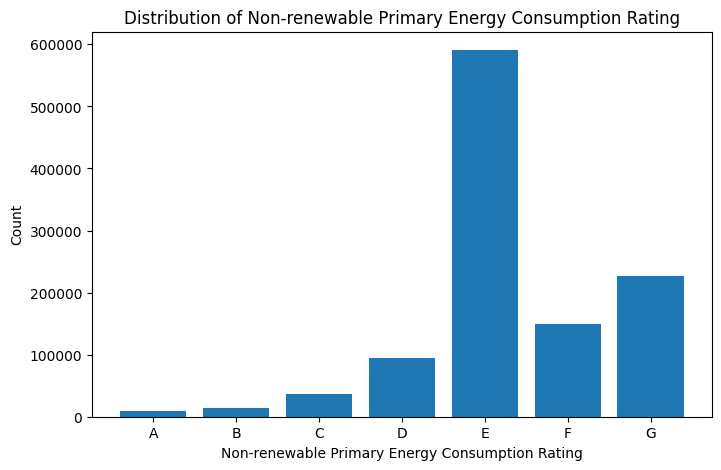

In [ ]:
import matplotlib.pyplot as plt

# Get value counts for the target column
rating_counts = df_energy['Non-renewable primary energy consumption rating'].value_counts().sort_index()

# Get original label mapping from all_mappings
rating_labels = [d['Original'] for d in all_mappings if d['Column'] == 'Non-renewable primary energy consumption rating']
# Ensure order matches encoded values
rating_labels_sorted = [label for _, label in sorted(zip([d['Encoded'] for d in all_mappings if d['Column'] == 'Non-renewable primary energy consumption rating'], rating_labels))]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(rating_labels_sorted, rating_counts)
plt.xlabel('Non-renewable Primary Energy Consumption Rating')
plt.ylabel('Count')
plt.title('Distribution of Non-renewable Primary Energy Consumption Rating')
plt.show()

We can see that the output class is very imbalanced. We can use techniques like oversampling, undersampling, or SMOTE to balance the classes. But for we will work the dataset as is. 

---

## Further Reading on Handling Imbalanced Datasets

1. **[Google ML Crash Course: Imbalanced Datasets](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)**  
   This guide explains how to address imbalanced datasets using techniques like downsampling and upweighting, providing practical insights into when and how to apply these methods.

2. **[GeeksforGeeks: Handling Imbalanced Data for Classification](https://www.geeksforgeeks.org/handling-imbalanced-data-for-classification/)**  
   An informative article covering various strategies such as resampling, synthetic data generation, and evaluation metrics to effectively manage imbalanced classification problems.

3. **[Analytics Vidhya: 10 Techniques to Deal with Class Imbalance](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)**  
   A comprehensive overview of practical methods including data augmentation, cost-sensitive learning, and ensemble techniques to handle class imbalance in machine learning tasks.

4. **[Medium: Class Imbalance Strategies — A Visual Guide with Code](https://medium.com/data-science/class-imbalance-strategies-a-visual-guide-with-code-8bc8fae71e1a)**  
   This visual guide illustrates common resampling techniques like SMOTE and ADASYN with accompanying code examples, aiding in the practical implementation of these strategies.

---


# Dataset after initial data cleaning

In [ ]:
# Merge column names with their descriptions from schema_df
col_info = pd.DataFrame({'Column Name': df_energy.columns}).reset_index().rename(columns={'index': 'Index'})
col_info = col_info.merge(schema_df[['Column Name', 'Description']], on='Column Name', how='left')
display(HTML(col_info.to_html(index=False)))


Index,Column Name,Description
0,POSTAL_CODE,Postal code
1,NAME_PROVINCE,Province
2,POPULATION_CODE,Municipality code (according to the Idescat table of municipalities in Catalonia)
3,COUNTY_CODE,County code (according to the table of counties of Catalonia and of the singular territorial entity of Aran de l'Idescat)
4,PROVINCE_CODE,Province code (according to the INE province table)
5,CLIMATIC ZONE,Climatic zone according to DB H1 of the Technical Building Code.
6,CADASTRE_METERS,Surface area (m2)
7,US_BUILDING,"Use of the building (housing, tertiary)"
8,Non-renewable primary energy consumption rating,Non-renewable primary energy qualification letter (AG)
9,Non-renewable primary energy,Non-renewable primary energy value [kWh/m2·year]


# Create train and test sets

Lets select our variables for the model. We will use the following variables as features:

In [ ]:
target_feature_name_regression = ["Final energy consumption"] # for regression
target_feature_name_classification = ["Non-renewable primary energy consumption rating"] # for classification

# target_feature_name = target_feature_name_regression
target_feature_name = target_feature_name_classification

# Select all columns except the target as features
selected_feature_name = [col for col in df_energy.columns if col not in target_feature_name]


We can see that the output class is very imbalanced. We can use techniques like oversampling, undersampling, or SMOTE to balance the classes. We can also use stratified sampling to ensure that the training and testing sets have the same class distribution as the original dataset.

---

## Further Reading on Stratified Sampling

1. **[Split Your Dataset With scikit-learn's train_test_split()](https://realpython.com/train-test-split-python-data/)**  
   This comprehensive guide explains how to use `train_test_split()` from scikit-learn, including the `stratify` parameter to maintain class distributions in training and testing sets. It covers practical examples and best practices for data splitting.

2. **[Mastering Train-Test-Split with Stratification on the CooperUnion Dataset](https://drlee.io/mastering-train-test-split-with-stratification-on-the-cooperunion-dataset-611e305aa46d)**  
   This article demonstrates the importance of stratified sampling using the CooperUnion dataset. It provides step-by-step instructions on implementing stratified splits to preserve category distributions, enhancing model generalization.



In [ ]:
# uncomment if not installed
# !pip install scikit-learn

from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
# Stratify based on the target feature to maintain class distribution in both sets
# This is crucial for classification tasks to avoid class imbalance issues
train_df, test_df = train_test_split(
    df_energy,
    test_size=0.2,
    random_state=42,
    stratify=df_energy[target_feature_name]
)

print(f"Train set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\there\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


Train set shape: (897157, 46)
Test set shape: (224290, 46)


In [ ]:
# Split features and target for train and test sets

# X: features, y: target
X_train = train_df[selected_feature_name]
y_train = train_df[target_feature_name]

X_test = test_df[selected_feature_name]
y_test = test_df[target_feature_name]

# Check shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Comments:
# - X_train and X_test contain the feature columns for training and testing, respectively.
# - y_train and y_test contain the target variable for training and testing, respectively.
# - These splits are ready for model training and evaluation.

X_train shape: (897157, 45), y_train shape: (897157, 1)
X_test shape: (224290, 45), y_test shape: (224290, 1)


# 3. Modeling

## 3.1 XGBOOST

In [ ]:
# %pip install xgboost

from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# If you want to encode the target for reporting
label_encoder = label_encoders['Non-renewable primary energy consumption rating']

# Define and train XGBoost model
xgb_classifier = xgb.XGBClassifier(
    max_depth=7,
    n_estimators=50,
    learning_rate=0.2,
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

xgb_classifier.fit(X_train, y_train.values.ravel())

In [ ]:
# Predict and evaluate
y_pred_probs = xgb_classifier.predict_proba(X_test)
y_pred = y_pred_probs.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)


report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose().reset_index()

# Style DataFrame
styled_df = (report_df.style
             .background_gradient(subset=['precision', 'recall', 'f1-score'], cmap='YlGnBu')
             .format({'precision': '{:.2%}', 'recall': '{:.2%}', 'f1-score': '{:.2%}'})
             .set_caption('Classification Metrics Report')
             .set_table_styles([{
                 'selector': 'caption',
                 'props': [('font-size', '16px'), ('font-weight', 'bold')]
             }]))

display(styled_df)


,index,precision,recall,f1-score,support
0,A,94.79%,93.14%,93.96%,1837.000000
1,B,87.12%,87.12%,87.12%,2670.000000
2,C,84.38%,88.02%,86.16%,7473.000000
3,D,88.61%,89.28%,88.94%,18892.000000
4,E,97.68%,97.86%,97.77%,118167.000000
5,F,95.26%,92.20%,93.71%,29776.000000
6,G,97.86%,98.53%,98.19%,45475.000000
7,accuracy,96.03%,96.03%,96.03%,0.960252
8,macro avg,92.24%,92.31%,92.26%,224290.000000
9,weighted avg,96.04%,96.03%,96.03%,224290.000000


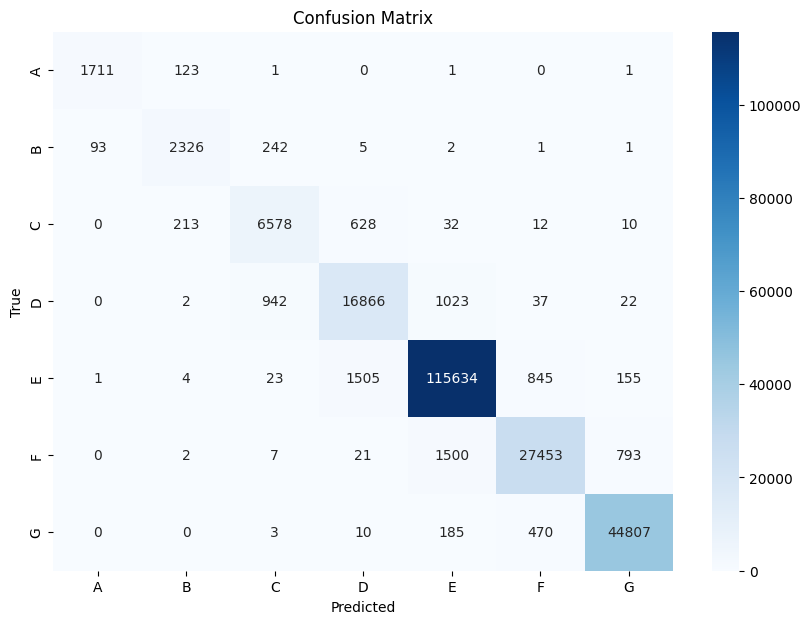

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = xgb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=label_encoder.classes_, 
           yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Observations

- The overall accuracy is very high, indicating strong predictive performance.
- Precision, recall, and F1-score are above 0.84 for all classes, with most above 0.93.
- The model performs best on the most frequent classes (E, F, G), as seen by their high F1-scores.
- Minority classes (A, B, C) have slightly lower scores, which is expected due to class imbalance.
- The confusion matrix shows most predictions are on the diagonal, indicating few misclassifications.
- Feature importance suggests 'Qualification of CO2 emissions' and 'Non-renewable primary energy' are the most influential features.

## Recommendations

- Consider using oversampling or class weighting if further improvement on minority classes is needed.
- Review the most important features for potential domain insights or further feature engineering.

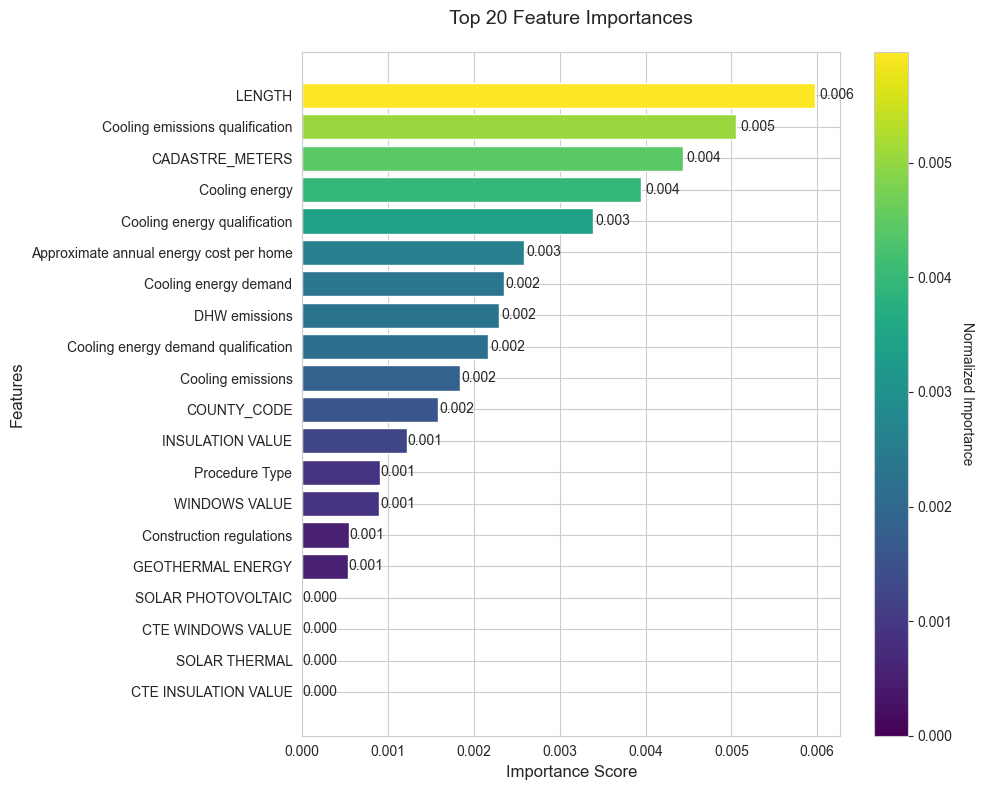

In [ ]:

fi_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values('Importance', ascending=True)
# Sort features by importance (ascending order)
fi_df = fi_df.sort_values('Importance', ascending=False).tail(20)  # Get top 20

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Create horizontal bar plot
bars = plt.barh(fi_df['Feature'], fi_df['Importance'], 
               color=plt.cm.viridis(fi_df['Importance']/fi_df['Importance'].max()))

# Add annotations
for bar in bars:
    width = bar.get_width()
    plt.text(width * 1.01, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}',
             va='center', ha='left')

# Style adjustments
plt.title('Top 20 Feature Importances', fontsize=14, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()  # Most important at top
plt.tight_layout()

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', 
                         norm=plt.Normalize(vmin=fi_df['Importance'].min(), 
                                         vmax=fi_df['Importance'].max()))
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Normalized Importance', rotation=270, labelpad=15)

plt.show()

**Figure Explanation: Top 20 Feature Importances (XGBoost Model)**

The figure above displays the top 20 most important features used by the XGBoost classifier to predict the *Non-renewable primary energy consumption rating* of buildings. Each horizontal bar represents a feature, and the length of the bar indicates its relative importance in the model's decision-making process.

- **Higher importance** means the feature contributes more to the model's predictions.
- The most influential features (at the top) include:
    - **Qualification of CO2 emissions**
    - **Non-renewable primary energy**
    - **US_BUILDING**
    - **CLIMATIC ZONE**
    - **NAME_PROVINCE**
- Features lower on the list have less impact on the model's output.

This ranking helps identify which building characteristics and energy metrics are most predictive of energy efficiency ratings, guiding both model interpretation and potential feature engineering.

## 🔍 Exploratory Actions Based on Model Evaluation and Feature Importance

Based on the insights from the model evaluation and feature importance analysis, here are several recommended next steps for deeper data exploration:

1. **Analyze Feature Distributions**  
   Examine how key features such as `'Qualification of CO2 emissions'` and `'Non-renewable primary energy'` are distributed across the different energy rating classes.

2. **Visualize Feature-Target Relationships**  
   Use boxplots, violin plots, or pairplots to explore how top-ranked features vary with the target energy rating.

3. **Investigate Multicollinearity**  
   Calculate and visualize correlations among top features to detect potential multicollinearity that may affect model performance.

4. **Explore Geospatial Patterns**  
   Map energy ratings or key features using available latitude and longitude data to uncover geographical trends.

5. **Assess Class Imbalance in Detail**  
   Dive deeper into class distributions and consider stratified sampling, SMOTE, or other resampling strategies to balance the dataset.

6. **Analyze Misclassifications**  
   Use the confusion matrix to identify frequently misclassified classes and analyze those samples to find potential patterns or edge cases.

7. **Study Categorical Feature Impact**  
   Evaluate how categorical variables like `'US_BUILDING'` and `'CLIMATIC ZONE'` influence the target variable through grouped visualizations or chi-square tests.

8. **Feature Engineering**  
   Create new features through interactions, ratios, or aggregations of related variables to enhance model learning.

9. **Investigate Temporal Trends**  
   If date/time data is available, explore trends over time—e.g., whether energy ratings have improved over the years.

10. **Review Missing Data Strategies**  
   Reassess how missing values were handled and experiment with different imputation methods to see their impact on model performance.

---

These steps can help refine your model, uncover hidden patterns, and improve both predictive performance and interpretability.


## 3.1.1 SHAP EXPLANATION (XG BOOST)

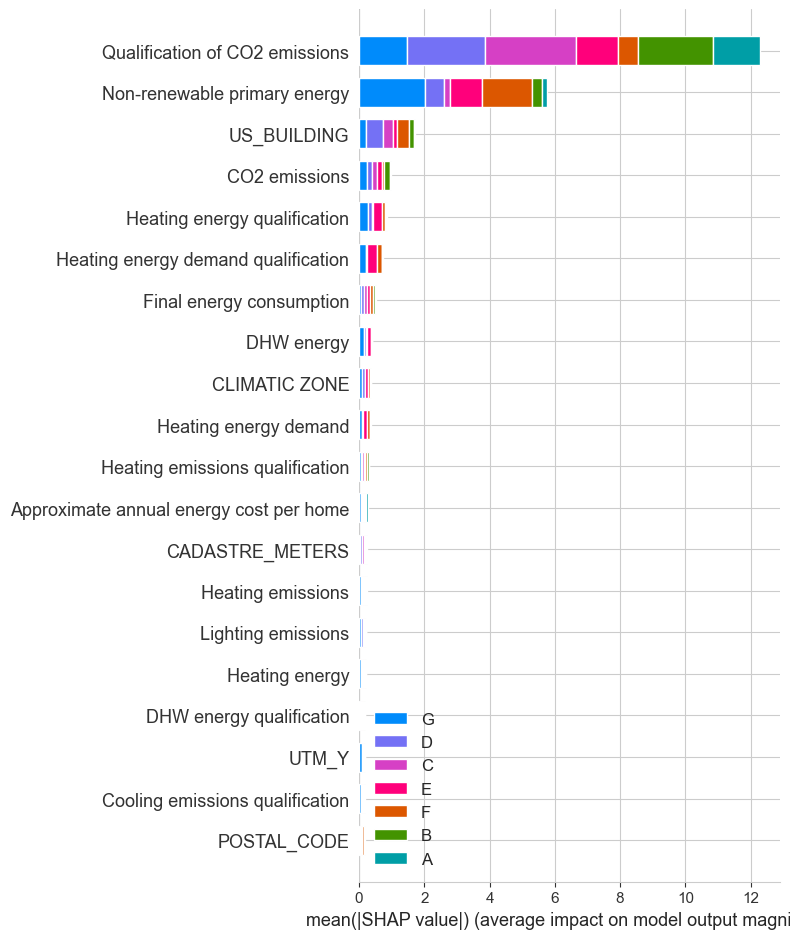

In [ ]:
# %pip install shap

import shap

# SHAP explainability (optimized for speed)
explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=selected_feature_name, plot_type='bar', class_names=label_encoder.classes_)


SHAP values for class 'A' (class index 0):
Shape: (224290, 45)


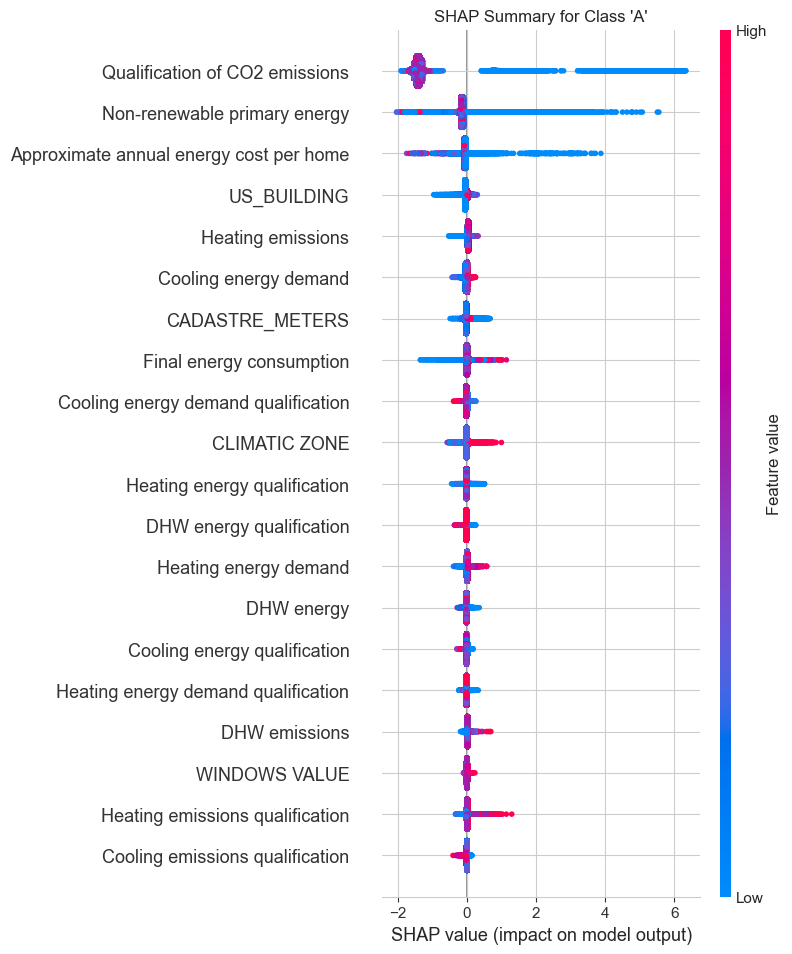


SHAP values for class 'B' (class index 1):
Shape: (224290, 45)


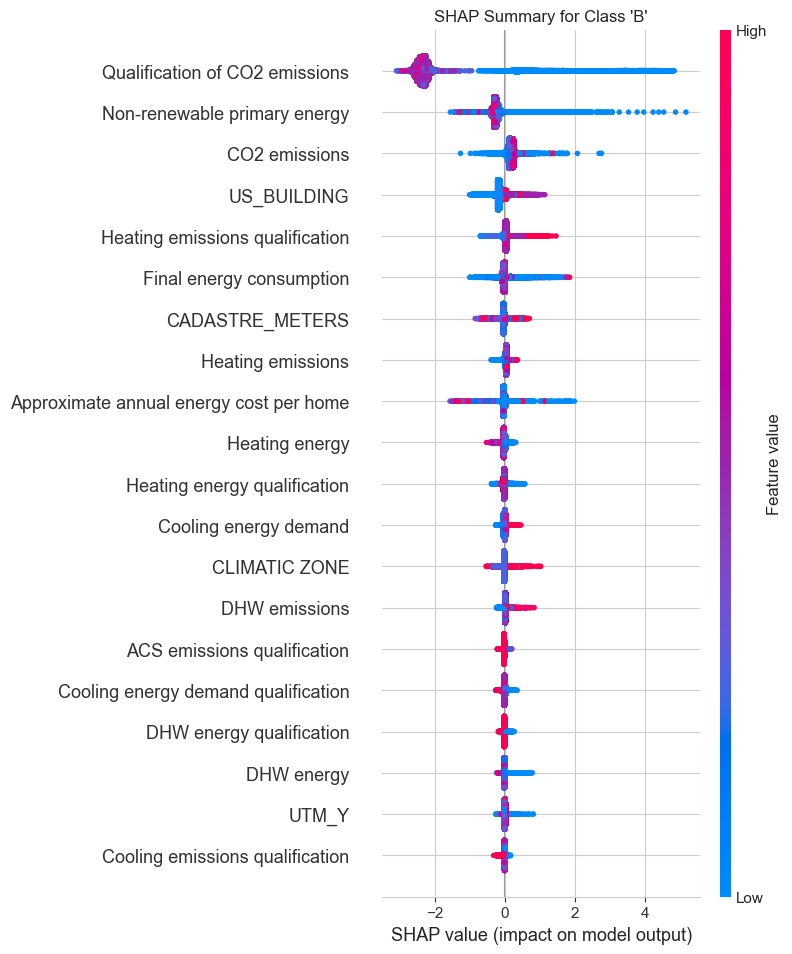


SHAP values for class 'C' (class index 2):
Shape: (224290, 45)


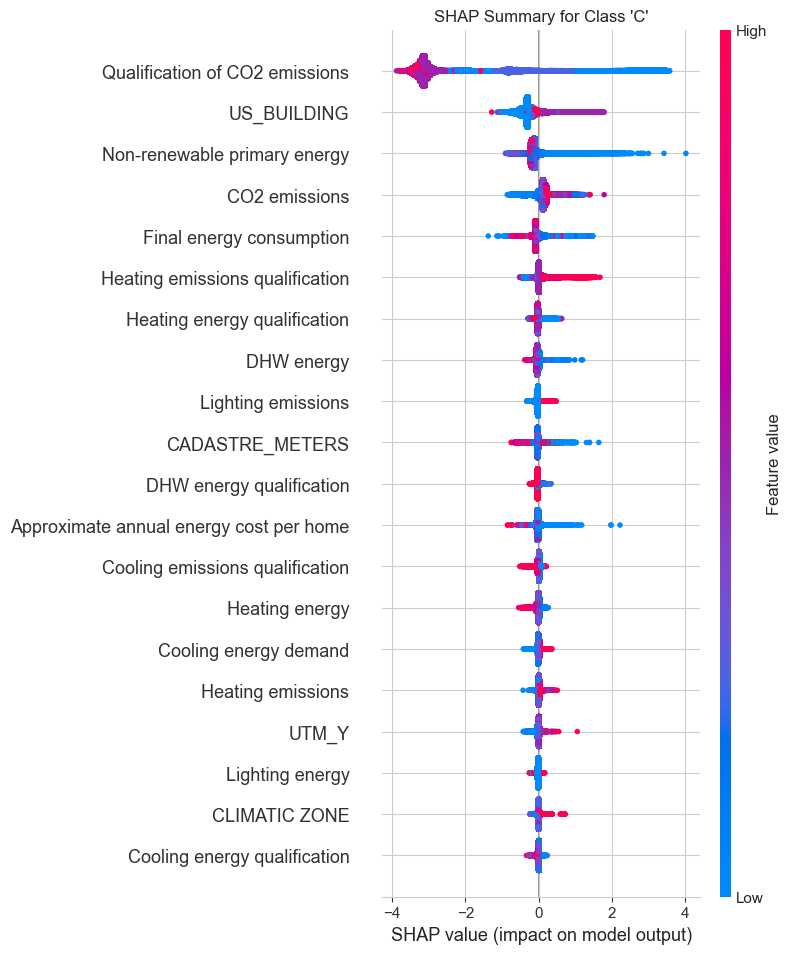


SHAP values for class 'D' (class index 3):
Shape: (224290, 45)


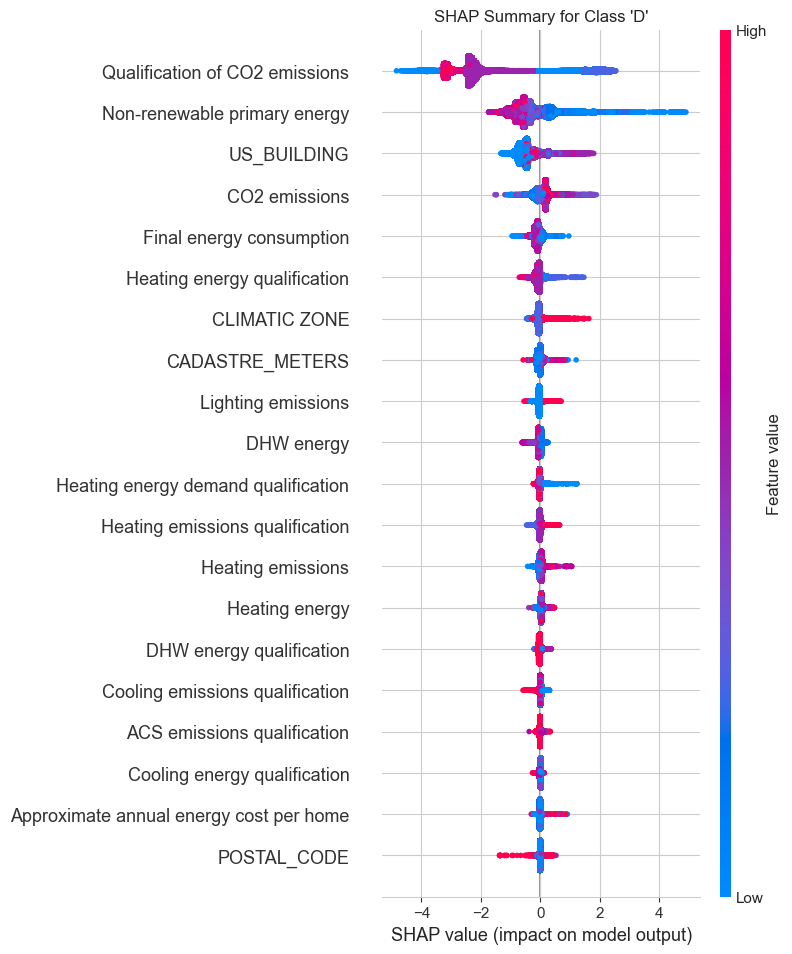


SHAP values for class 'E' (class index 4):
Shape: (224290, 45)


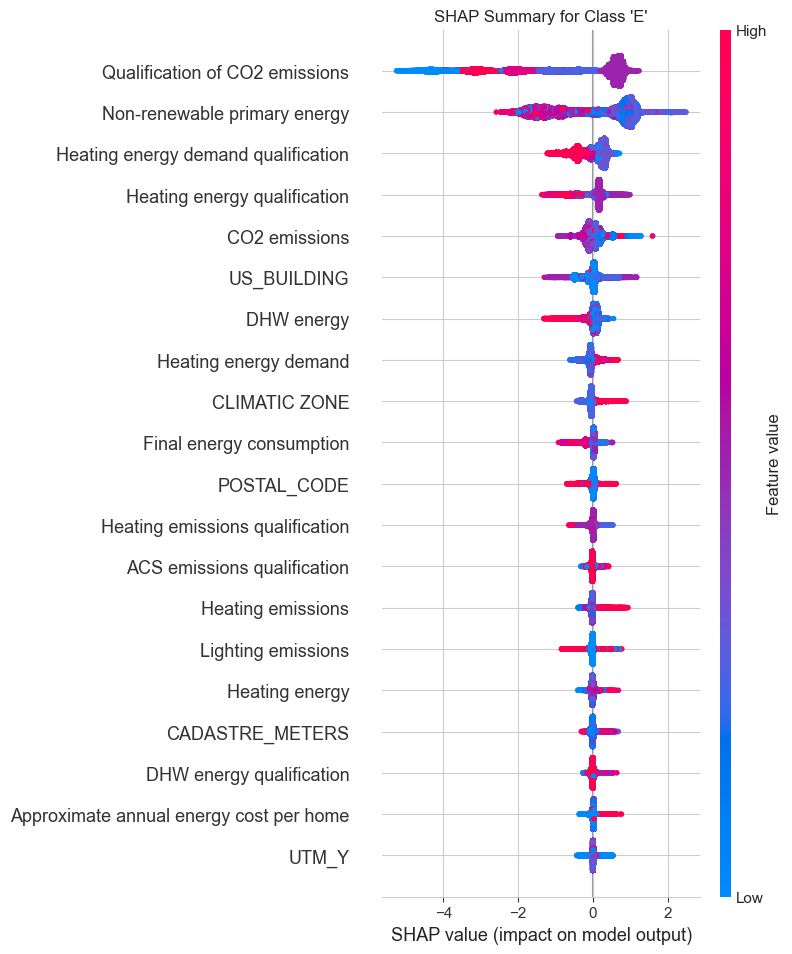


SHAP values for class 'F' (class index 5):
Shape: (224290, 45)


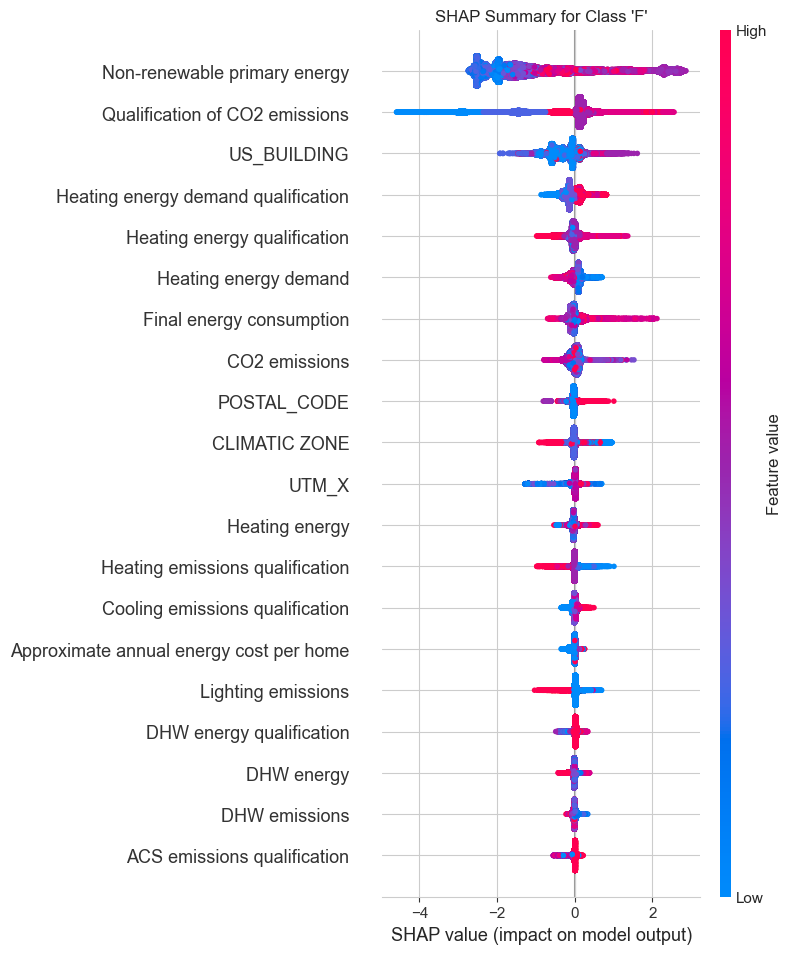


SHAP values for class 'G' (class index 6):
Shape: (224290, 45)


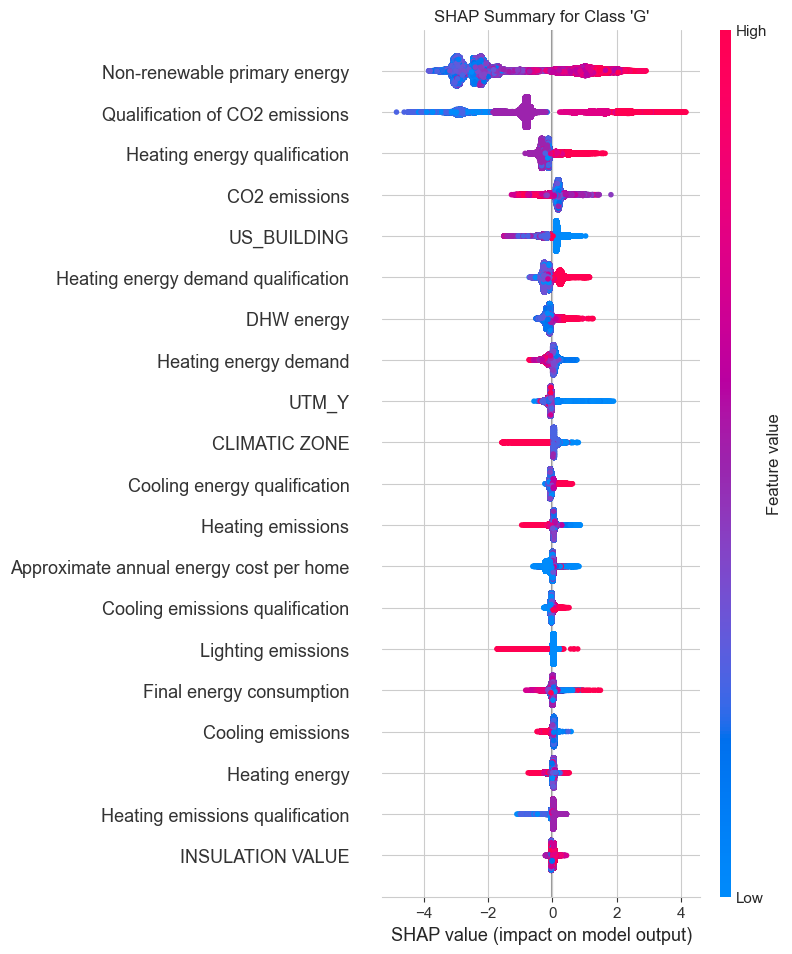

In [68]:
# shap_values is already computed: shap_values = explainer.shap_values(X_test)

for class_idx, class_name in enumerate(label_encoder.classes_):
    print(f"\nSHAP values for class '{class_name}' (class index {class_idx}):")
    # Each element in shap_values corresponds to a class
    class_shap = shap_values[class_idx]
    print(f"Shape: {class_shap.shape}")
    # Show summary plot for this class
    shap.summary_plot(class_shap, X_test, feature_names=selected_feature_name, show=False)
    plt.title(f"SHAP Summary for Class '{class_name}'")
    plt.show()


## Post-Model Analysis and Next Steps

Now that we’ve completed a full cycle — training the model, evaluating its performance, and analyzing how it behaves based on the data — it’s a good time to reflect and plan forward.

### Review of SHAP Value Insights

One key area to focus on is the **SHAP value analysis**, particularly for the most influential feature:  
**`Non-renewable primary energy`**.

Pay specific attention to:

- **The direction of the SHAP value distribution**:  
  - Does most of the distribution lie to the **left** (indicating a negative impact on prediction) or to the **right** (positive impact)?
  - Some classes are skewed to the left, while others are skewed to the right. Can you explain this behavior?
  - Should it be like this? If so, why? If not, what could be causing this?

Learn More About SHAP Values

To better understand how SHAP values work and how to interpret them effectively, check out the following tutorials and guides:

1. **[SHAP Beeswarm Plot Example (official SHAP docs)](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html)**  
   A practical example of the beeswarm plot, showing how SHAP values highlight feature impact across predictions.

2. **[Your Intuitive Guide to Interpret SHAP's Beeswarm Plot – by Deena Gergis](https://www.linkedin.com/pulse/your-intuitive-guide-interpret-shaps-beeswarm-plot-deena-gergis-1jw9f/)**  
   A great beginner-friendly explanation that breaks down how to read and reason about SHAP beeswarm plots.

3. **[Understanding SHAP Explanations in Healthcare Models (PubMed)](https://pmc.ncbi.nlm.nih.gov/articles/PMC11513550/)**  
   A research article that explores SHAP values in a real-world context, particularly in medical predictive models.

4. **[Interpretable Machine Learning – SHAP Chapter by Christoph Molnar](https://christophm.github.io/interpretable-ml-book/shap.html)**  
   A deeper dive into the theory behind SHAP, how it works, and why it's grounded in Shapley values from cooperative game theory.




### Next Steps
One of the next important steps is to take a **critical look at which features you're including in your model**. 

Don't just go with the features that give you the highest accuracy — you might end up with a very accuracte model that is not very useful. Instead, think about it this way:

- What features actually make sense for the problem you're solving?
- Which ones align with your **domain knowledge** in building energy retrofitting?
- Are there any features that might be influencing the model too much or in the wrong way? 
- Does it make sense to include the ratings for CO₂ emissions and non-renewable primary energy consumption? Are they inputs or outputs?
- If you cannot change a feature, like the location of the building, should you include it in the model? What happens if you remove it? 


Remember, your goal isn't just to build a model that performs well — it's to build one that makes sense, is interpretable, and can give you **actionable insights**. So use your expertise to decide which features **should** be included.

Here are some other potential next steps:

- Review the **feature scaling** or **preprocessing strategy**
- Re-express this feature or even isolate cases where misclassification correlates with specific SHAP patterns
- Try a different XAI technique that is known to provide actionable suggestions. Justify your choice using the appropriate literature.
---

Understanding *why* the model reacts to certain feature values in the way it does is key to refining its performance and trustworthiness. Let this guide your next round of improvements.
